In [27]:
!pip install shap

In [28]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load data
file_path = '../Datasets/PTSD_data_mapped.csv'  # Adjust path if needed
data = pd.read_csv(file_path)
data

,Unnamed: 0,IQ,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,99.0,1,17.603385,17.243334,11.729942,15.381709,18.307108,28.369365,11.764645,...,94.727123,73.994841,75.159075,72.479599,81.756815,74.578657,78.980627,60.508215,65.113378,69.238767
1,2,120.0,1,21.714048,19.579805,18.522271,26.820075,25.429025,27.345290,16.839109,...,83.821476,61.617403,63.964423,73.096645,74.161249,50.432291,77.440228,35.794362,70.592405,48.283439
2,3,116.0,1,13.371076,14.028142,16.901291,21.767857,18.227411,16.825877,17.859026,...,70.585726,63.864062,46.127953,65.675414,62.455949,33.114945,56.163998,37.477109,72.732968,46.665464
3,4,137.0,1,30.473244,13.954586,23.056715,26.177810,27.884679,24.520958,19.931770,...,87.768539,71.799769,65.845016,67.734909,78.328065,58.141474,68.113967,53.391012,71.111448,67.598506
4,5,89.0,1,18.488575,19.603144,9.899157,21.724115,32.700666,24.510528,13.788542,...,70.188502,27.698816,24.181746,34.445899,47.797466,20.737129,47.210870,11.104500,50.442443,36.952529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,114.0,0,22.737005,23.110192,20.655895,18.224802,19.315381,16.482197,15.050377,...,88.188438,48.337650,77.414168,76.804444,51.999675,76.470883,80.365068,48.841509,56.730760,82.017645
100,101,118.0,0,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,...,99.447826,99.424714,44.181841,61.683927,99.513428,43.007308,62.525177,42.766646,62.843978,39.895496
101,102,113.0,0,46.306229,47.379694,48.808082,50.943346,43.768029,41.659826,28.124478,...,90.988675,82.588144,91.869140,88.146513,82.027254,87.799612,85.360432,84.867957,90.909785,90.730560
102,103,130.0,0,22.152399,22.698280,19.281922,28.462510,31.292110,27.909515,19.878541,...,58.751205,46.407702,55.207337,50.262542,56.166800,37.817569,55.401371,31.634053,67.817508,43.937626


In [29]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
from sklearn.model_selection import train_test_split

X = data.drop('specific.disorder', axis=1, inplace=False)
y = data['specific.disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
X,y

(        IQ  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
 0     99.0         17.603385         17.243334        11.729942   
 1    120.0         21.714048         19.579805        18.522271   
 2    116.0         13.371076         14.028142        16.901291   
 3    137.0         30.473244         13.954586        23.056715   
 4     89.0         18.488575         19.603144         9.899157   
 ..     ...               ...               ...              ...   
 99   114.0         22.737005         23.110192        20.655895   
 100  118.0         20.081892         17.928614        15.977752   
 101  113.0         46.306229         47.379694        48.808082   
 102  130.0         22.152399         22.698280        19.281922   
 103  130.0         37.450821         54.405099        24.135037   
 
      AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
 0          15.381709        18.307108        28.369365        11.764645   
 1          26.820075        2

In [32]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
# Hyperparameter tuning
param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [1, 3, 6, None]
}
grid_search = GridSearchCV(CatBoostClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

Learning rate set to 0.029402
0:	learn: 0.6878498	total: 31.9ms	remaining: 3.16s
1:	learn: 0.6771430	total: 35.1ms	remaining: 1.72s
2:	learn: 0.6675783	total: 37.5ms	remaining: 1.21s
3:	learn: 0.6656135	total: 49ms	remaining: 1.18s
4:	learn: 0.6606283	total: 51.2ms	remaining: 973ms
5:	learn: 0.6569365	total: 54.2ms	remaining: 849ms
6:	learn: 0.6494346	total: 57.7ms	remaining: 766ms
7:	learn: 0.6446257	total: 62.2ms	remaining: 715ms
8:	learn: 0.6417606	total: 74.6ms	remaining: 754ms
9:	learn: 0.6361163	total: 76.2ms	remaining: 686ms
10:	learn: 0.6319213	total: 77.8ms	remaining: 629ms
11:	learn: 0.6258174	total: 79.6ms	remaining: 583ms
12:	learn: 0.6229822	total: 81.3ms	remaining: 544ms
13:	learn: 0.6168759	total: 82.9ms	remaining: 510ms
14:	learn: 0.6127136	total: 85.2ms	remaining: 483ms
15:	learn: 0.6120140	total: 86.8ms	remaining: 456ms
16:	learn: 0.6073440	total: 88.7ms	remaining: 433ms
17:	learn: 0.6034199	total: 90.2ms	remaining: 411ms
18:	learn: 0.6008013	total: 92.3ms	remaining: 

In [33]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

best_model.fit(X_train, y_train)

# Evaluate model performance
y_pred = best_model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Learning rate set to 0.02767
0:	learn: 0.6865035	total: 56.8ms	remaining: 5.62s
1:	learn: 0.6797754	total: 133ms	remaining: 6.5s
2:	learn: 0.6717448	total: 141ms	remaining: 4.54s
3:	learn: 0.6620377	total: 161ms	remaining: 3.85s
4:	learn: 0.6504340	total: 170ms	remaining: 3.23s
5:	learn: 0.6415185	total: 176ms	remaining: 2.75s
6:	learn: 0.6325352	total: 181ms	remaining: 2.4s
7:	learn: 0.6255010	total: 195ms	remaining: 2.24s
8:	learn: 0.6179581	total: 203ms	remaining: 2.06s
9:	learn: 0.6094268	total: 210ms	remaining: 1.89s
10:	learn: 0.5981964	total: 218ms	remaining: 1.76s
11:	learn: 0.5933732	total: 231ms	remaining: 1.69s
12:	learn: 0.5799500	total: 240ms	remaining: 1.6s
13:	learn: 0.5714354	total: 249ms	remaining: 1.53s
14:	learn: 0.5664040	total: 255ms	remaining: 1.45s
15:	learn: 0.5557847	total: 260ms	remaining: 1.37s
16:	learn: 0.5496146	total: 265ms	remaining: 1.3s
17:	learn: 0.5437118	total: 272ms	remaining: 1.24s
18:	learn: 0.5392675	total: 278ms	remaining: 1.18s
19:	learn: 0.52

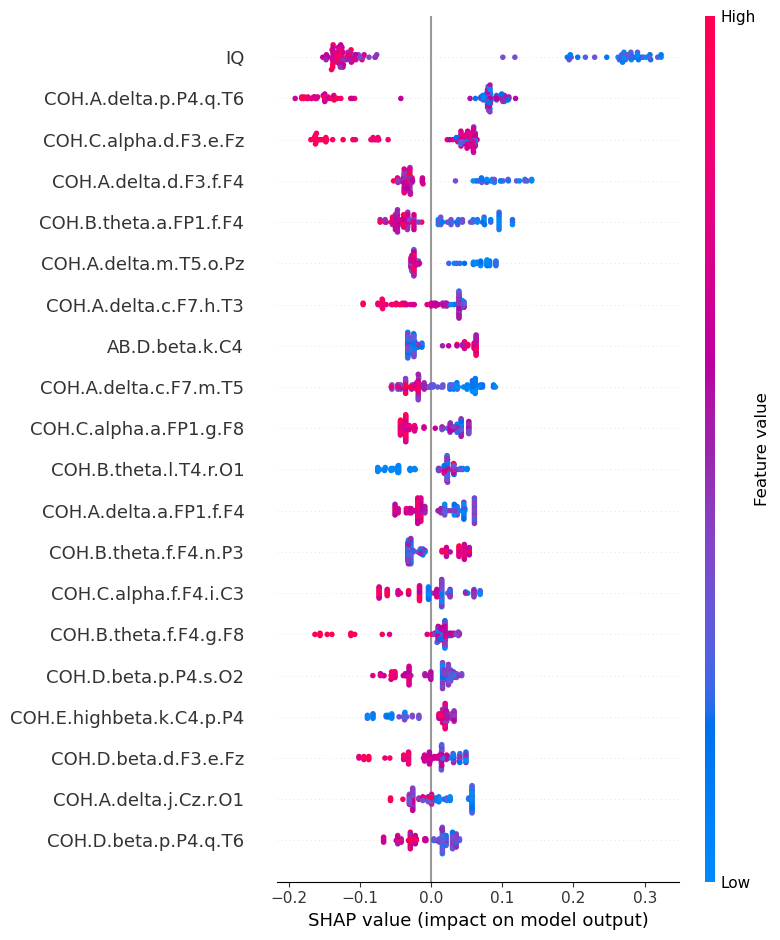

In [34]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)
# Example: Use a small subset of data for explanation
X_sample = X
# Visualize SHAP values
shap.summary_plot(shap_values, X_sample)

In [35]:
print(type(shap_values))
print(len(shap_values))
print(shap_values.shape)

<class 'numpy.ndarray'>
104
(104, 1141)


In [39]:
shap.dependence_plot(shap_values[0], X_sample[0])  # For the first feature

KeyError: 0

In [40]:
initjs()

NameError: name 'initjs' is not defined

In [36]:
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0])

In [37]:
import shap  # SHAP library
import matplotlib.pyplot as plt

In [38]:
# Step 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 7: Initialize SHAP Explainer
# TreeExplainer works efficiently for tree-based models like Random Forest
explainer = shap.TreeExplainer(model)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

NameError: name 'model' is not defined

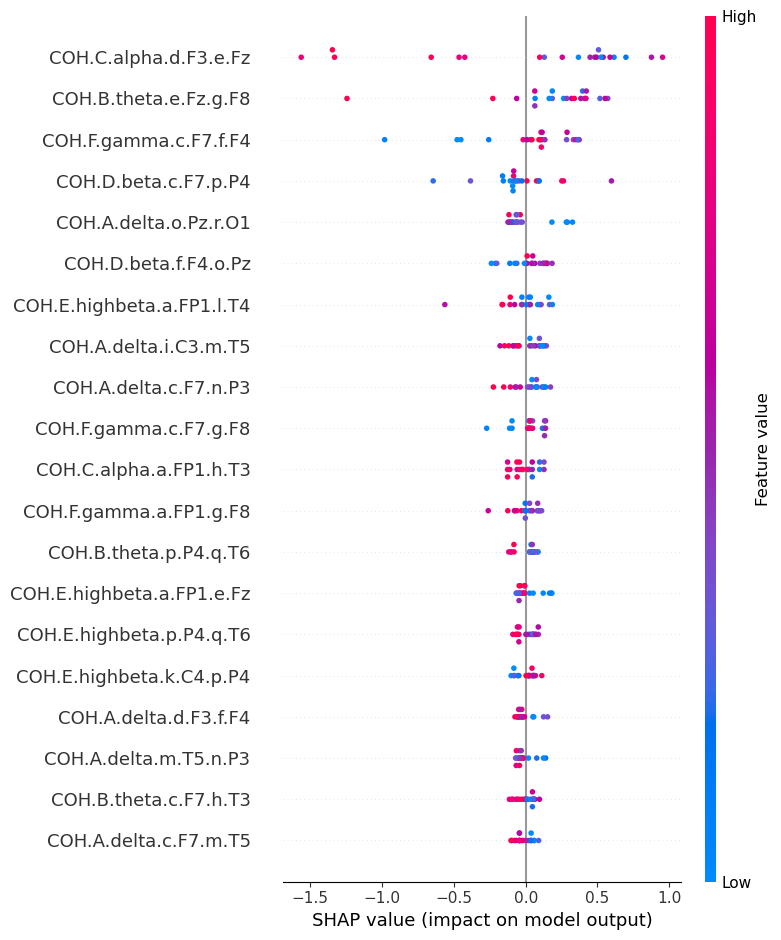

In [ ]:

# Visualize important EEG features
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Force plot for a specific EEG recording
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])